In [22]:
%reload_ext autoreload
%autoreload 2

from databallpy import get_saved_game

import accessible_space
print("geladen von:", getattr(accessible_space, "__file__", None) or accessible_space.__spec__.origin)
print("search locations:", list(accessible_space.__spec__.submodule_search_locations or []))


game_id = "J03WQQ"

path = "../../datasets/IDSSE/"
game = get_saved_game(name=game_id, path=path)
coordinate_cols = []
player_to_team = {}
col_ids = game.get_column_ids() + ["ball"]
for col in col_ids: 
    coordinate_cols.append(
        [f"{col}_x", f"{col}_y", f"{col}_vx", f"{col}_vy"]
    )
    player_to_team[str(col)] = col.split("_")[0]

game.tracking_data.add_velocity(col_ids, max_velocity=30)
game.synchronise_tracking_and_event_data()
game.tracking_data.add_individual_player_possession()
df_frameified = accessible_space.per_object_frameify_tracking_data(game.tracking_data, "frame", coordinate_cols, col_ids, player_to_team, new_coordinate_cols=("player_x", "player_y", "player_vx", "player_vy"))

geladen von: /Users/hartmax/Documents/Uni/Masterarbeit/def-accessible-space/venv/lib/python3.13/site-packages/accessible_space/__init__.py
search locations: ['/Users/hartmax/Documents/Uni/Masterarbeit/def-accessible-space/venv/lib/python3.13/site-packages/accessible_space']


In [ ]:
import importlib
# import accessible_space.interface
# importlib.reload(accessible_space.interface)
# from accessible_space.interface import get_dangerous_accessible_space


df_frameified_filtered = df_frameified[df_frameified["player_x"].notna()]
df_frameified_filtered = df_frameified_filtered[df_frameified_filtered["frame"].isin([153037])]


# df_frameified_filtered["player_possession_manually"] = "away_23"
print("geladen von:", getattr(accessible_space, "__file__", None) or accessible_space.__spec__.origin)
pitch_result = accessible_space.get_dangerous_accessible_space(
            df_frameified_filtered,
            frame_col="frame",
            player_col="player_id",
            ball_player_id="ball",
            x_col="player_x",
            y_col="player_y",
            vx_col="player_vx",
            vy_col="player_vy",
            team_col="team_id",
            period_col="period_id",
            team_in_possession_col="team_possession",
            attacking_direction_col=None,
            infer_attacking_direction=True,
            respect_offside=True,
            player_in_possession_col="player_possession",
            use_progress_bar=False,
        )

df_frameified_filtered["DAS"] = pitch_result.das
display(df_frameified_filtered)
display(pitch_result)


geladen von: /Users/hartmax/Documents/Uni/Masterarbeit/def-accessible-space/venv/lib/python3.13/site-packages/accessible_space/__init__.py


,frame,player_x,player_y,player_vx,player_vy,player_id,team_id,ball_z,ball_status,team_possession,...,ball_velocity,ball_ax,ball_ay,ball_acceleration,databallpy_event,event_id,sync_certainty,player_possession,player_possession_manually,DAS
143037,153037,-8.47,-17.40,0.875,-0.750,home_13,home,0.12,alive,away,...,4.339139,0.520833,-1.785714,1.860119,None,-999,NaN,away_23,away_23,NaN
306178,153037,1.02,-21.87,0.125,-0.500,home_28,home,0.12,alive,away,...,4.339139,0.520833,-1.785714,1.860119,None,-999,NaN,away_23,away_23,NaN
469319,153037,-25.31,-18.80,-0.125,0.250,home_25,home,0.12,alive,away,...,4.339139,0.520833,-1.785714,1.860119,None,-999,NaN,away_23,away_23,NaN
795601,153037,-9.62,-21.31,-3.375,0.250,home_11,home,0.12,alive,away,...,4.339139,0.520833,-1.785714,1.860119,None,-999,NaN,away_23,away_23,NaN
958742,153037,-15.55,-2.08,0.000,-1.125,home_29,home,0.12,alive,away,...,4.339139,0.520833,-1.785714,1.860119,None,-999,NaN,away_23,away_23,NaN
1285024,153037,-12.13,13.90,-0.125,-1.500,home_19,home,0.12,alive,away,...,4.339139,0.520833,-1.785714,1.860119,None,-999,NaN,away_23,away_23,NaN
1448165,153037,-39.67,-3.63,-1.375,0.625,home_33,home,0.12,alive,away,...,4.339139,0.520833,-1.785714,1.860119,None,-999,NaN,away_23,away_23,NaN
1774447,153037,-23.20,-3.21,0.250,-1.000,home_15,home,0.12,alive,away,...,4.339139,0.520833,-1.785714,1.860119,None,-999,NaN,away_23,away_23,NaN
2100729,153037,-22.67,-8.88,0.375,-0.375,home_5,home,0.12,alive,away,...,4.339139,0.520833,-1.785714,1.860119,None,-999,NaN,away_23,away_23,NaN
2263870,153037,-22.89,8.75,0.500,-0.625,home_8,home,0.12,alive,away,...,4.339139,0.520833,-1.785714,1.860119,None,-999,NaN,away_23,away_23,NaN


ReturnValueDAS(acc_space=143037     2112.887273
306178     2112.887273
469319     2112.887273
795601     2112.887273
958742     2112.887273
1285024    2112.887273
1448165    2112.887273
1774447    2112.887273
2100729    2112.887273
2263870    2112.887273
2427011    2112.887273
2590152    2112.887273
2753293    2112.887273
2916434    2112.887273
3242716    2112.887273
3732139    2112.887273
3895280    2112.887273
4058421    2112.887273
4221562    2112.887273
4710985    2112.887273
4874126    2112.887273
5200408    2112.887273
Name: frame, dtype: float64, das=143037    NaN
306178    NaN
469319    NaN
795601    NaN
958742    NaN
1285024   NaN
1448165   NaN
1774447   NaN
2100729   NaN
2263870   NaN
2427011   NaN
2590152   NaN
2753293   NaN
2916434   NaN
3242716   NaN
3732139   NaN
3895280   NaN
4058421   NaN
4221562   NaN
4710985   NaN
4874126   NaN
5200408   NaN
Name: frame, dtype: float64, frame_index=143037     0
306178     0
469319     0
795601     0
958742     0
1285024    0
1448165  

/Users/hartmax/Documents/Uni/Masterarbeit/def-accessible-space/venv/lib/python3.13/site-packages/matplotlib/tri/_triangulation.py:181: RuntimeWarning: invalid value encountered in cast
  triangles = np.asarray(triangles, dtype=np.int32)


ValueError: z array must not contain non-finite values within the triangulation

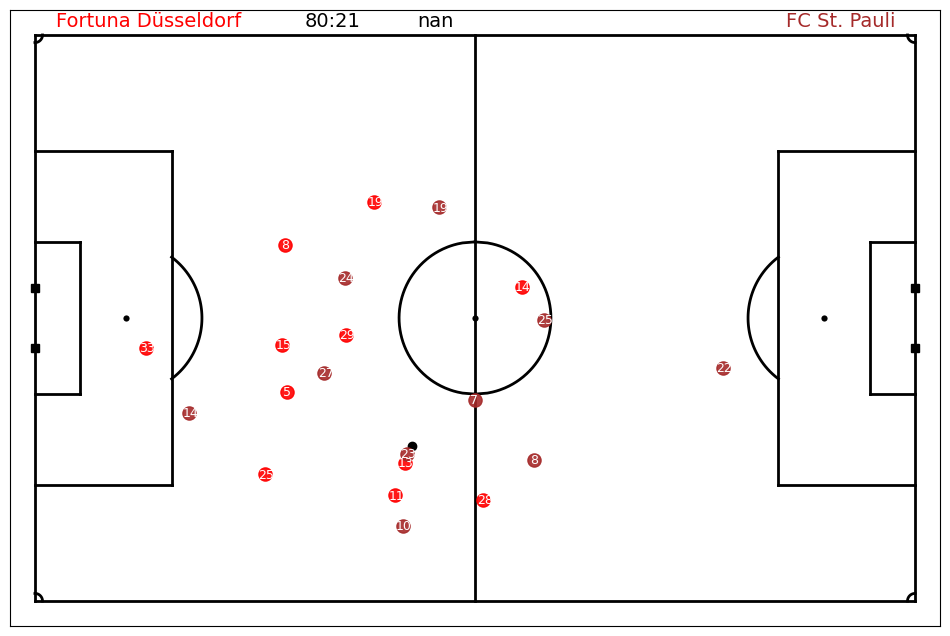

In [10]:
from databallpy.visualize import plot_soccer_pitch, plot_tracking_data
import matplotlib.pyplot as plt

idx = game.tracking_data[game.tracking_data["frame"]==153037].index[0]
fig, ax = plt.subplots(figsize=(12, 8))
plot_soccer_pitch(pitch_color="white", fig=fig, ax=ax)
plot_tracking_data(game, idx, fig=fig, ax=ax, team_colors=["red", "brown"], variable_of_interest=pitch_result.das.iloc[0])
accessible_space.plot_expected_completion_surface(pitch_result.dangerous_result, frame_index=0, color="blue")
plt.show()

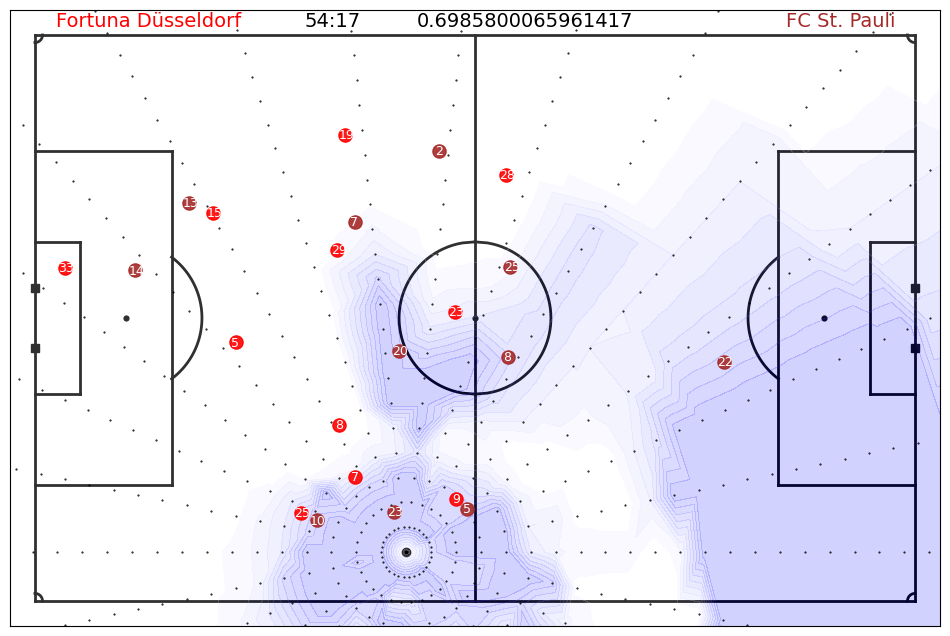

In [90]:
from databallpy.visualize import plot_soccer_pitch, plot_tracking_data
import matplotlib.pyplot as plt

idx = game.tracking_data[game.tracking_data["frame"]==113945].index[0]
fig, ax = plt.subplots(figsize=(12, 8))
plot_soccer_pitch(pitch_color="white", fig=fig, ax=ax)
plot_tracking_data(game, idx, fig=fig, ax=ax, team_colors=["red", "brown"], variable_of_interest=pitch_result.das.iloc[0])
accessible_space.plot_expected_completion_surface(pitch_result.simulation_result, frame_index=0, color="blue")
plt.show()